# Model building

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### Load the data

In [2]:
df = pd.read_csv('full_data.csv')

In [3]:
activityID_col = df['activityID']

# not needed for building the model
df.drop(['timestamp', 'activityID'], axis=1, inplace=True)

df

,heart rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,hand_mag_z,hand_ori_1,hand_ori_2,hand_ori_3,hand_ori_4,chest_temp,chest_acc16g_x,chest_acc16g_y,chest_acc16g_z,chest_acc6g_x,chest_acc6g_y,chest_acc6g_z,chest_gyro_x,chest_gyro_y,chest_gyro_z,chest_mag_x,chest_mag_y,chest_mag_z,chest_ori_1,chest_ori_2,chest_ori_3,chest_ori_4,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_acc6g_x,ankle_acc6g_y,ankle_acc6g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_1,ankle_ori_2,ankle_ori_3,ankle_ori_4
0,161.981391,24.875,-9.02648,3.43661,1.54825,-9.01793,3.42057,1.15826,0.555154,-0.151351,0.056916,50.18700,5.88661,-19.5242,0.644648,-0.470245,-0.313166,0.515002,32.000,-1.67201,9.44006,-5.710660,-1.85281,9.35804,-5.497500,0.260544,-0.541024,-0.341752,26.41180,-26.1111,32.6134,0.482388,-0.828221,-0.271904,-0.086141,31.3125,6.10403,0.984611,-4.55185,6.27948,3.217450,-4.21250,-0.101032,-0.057742,-0.248516,-41.8305,-16.0762,5.25108,0.574394,-0.385625,0.698415,-0.183254
1,161.981391,24.875,-9.03504,3.35872,1.31746,-9.07594,3.51178,1.33933,0.446266,-0.032756,0.090240,49.92550,6.52141,-19.0026,0.643095,-0.472701,-0.311599,0.515644,32.000,-1.43348,9.70499,-5.397430,-1.73217,9.46350,-5.558370,0.258565,-0.484271,-0.314961,26.29660,-26.2351,31.9083,0.482145,-0.828605,-0.272141,-0.083006,31.3125,5.72218,-1.112940,-3.11494,5.79924,1.009420,-3.94554,-0.205677,-0.029978,0.074442,-41.4590,-15.8389,4.68478,0.574657,-0.384733,0.698825,-0.182742
2,139.000000,24.875,-9.05919,3.58967,1.66270,-9.12040,3.49709,1.44511,0.381105,0.069561,0.111911,50.55390,6.23940,-19.3958,0.641600,-0.475189,-0.310417,0.515932,32.000,-1.31699,10.08140,-5.357820,-1.54924,9.68926,-5.392580,0.230525,-0.413830,-0.314570,26.93590,-25.4845,31.4854,0.482024,-0.828847,-0.272478,-0.080132,31.3125,5.29642,-1.915460,-2.14958,5.51824,-0.970548,-2.74200,-0.280073,0.034477,0.431696,-42.1015,-15.5489,4.82402,0.574965,-0.382317,0.699790,-0.183148
3,161.981391,24.875,-9.09083,3.70512,1.81579,-9.13307,3.63325,1.59583,0.253884,0.168181,0.160226,50.81220,5.60505,-19.5237,0.640446,-0.477570,-0.309667,0.515618,32.000,-1.08602,10.08120,-5.276190,-1.38051,10.00550,-5.181110,0.116015,-0.354116,-0.284253,26.92260,-25.2266,32.0479,0.482021,-0.828923,-0.272902,-0.077896,31.3125,4.45626,-2.171530,-2.69686,5.02562,-1.816670,-1.93449,-0.240229,0.088297,0.643419,-41.7191,-15.8272,4.25836,0.575159,-0.379253,0.700982,-0.184346
4,161.981391,24.875,-9.12301,3.93405,1.93000,-9.19222,3.72433,1.64100,0.105799,0.288910,0.234886,50.81220,5.60505,-19.5237,0.639727,-0.479840,-0.309408,0.514558,32.000,-1.13095,9.66586,-5.469260,-1.27475,10.06560,-5.166460,0.097897,-0.352353,-0.221822,27.05760,-24.7149,31.1999,0.482220,-0.828978,-0.272989,-0.075741,31.3125,5.74280,-1.385140,-2.34124,4.64947,-1.937920,-2.06832,0.123370,0.043536,0.780235,-42.2335,-15.4140,4.68156,0.574358,-0.376820,0.702217,-0.187113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724948,96.441056,34.750,2.37663,8.01542,5.93722,2.76269,8.58070,6.14836,0.234319,-0.099865,-0.202976,8.01054,-12.35420,-43.3436,0.893579,-0.347882,0.202275,0.198946,36.125,1.71816,9.68980,-0.577606,1.26385,9.49447,-0.105607,-0.102455,-0.076190,0.008494,8.50736,-31.7183,-16.2669,0.647660,-0.605949,0.348619,0.303031,34.3125,9.67824,-0.308950,-2.30756,9.59263,-0.227592,-1.99413,-0.009259,0.022511,-0.049799,-38.9013,31.6323,-7.84251,0.542273,0.403227,0.687356,0.266249
2724949,96.441056,34.750,2.27289,7.86723,6.24407,2.75950,8.09755,6.25513,0.211067,-0.091888,-0.172105,8.37527,-12.00110,-42.9528,0.892954,-0.348894,0.202594,0.199656,36.125,1.15987,9.58174,-0.122718,1.39992,9.66027,-0.166397,-0.045492,-0.055623,-0.024051,8.50183,-31.2021,-16.4108,0.647685,-0.605838,0.348

### Standartize data

In [4]:
scaler = StandardScaler()

data_std = scaler.fit_transform(df)

df_std = pd.DataFrame(data_std, columns=df.columns)
df_std

,heart rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,hand_mag_z,hand_ori_1,hand_ori_2,hand_ori_3,hand_ori_4,chest_temp,chest_acc16g_x,chest_acc16g_y,chest_acc16g_z,chest_acc6g_x,chest_acc6g_y,chest_acc6g_z,chest_gyro_x,chest_gyro_y,chest_gyro_z,chest_mag_x,chest_mag_y,chest_mag_z,chest_ori_1,chest_ori_2,chest_ori_3,chest_ori_4,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_acc6g_x,ankle_acc6g_y,ankle_acc6g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_1,ankle_ori_2,ankle_ori_3,ankle_ori_4
0,2.412961,-4.195581,-0.838447,-0.030246,-0.578505,-0.847352,-0.032303,-0.716334,0.426809,-0.198043,0.042323,1.383191,0.893985,0.274167,0.114029,-1.261259,-0.737691,1.055830,-2.402383,-1.219597,0.290289,-0.898144,-1.246570,0.274222,-0.918510,0.602133,-0.988866,-1.025475,1.436466,0.276847,1.264266,-0.191387,-1.564818,-0.707391,-0.380349,-1.792619,-0.483091,0.177209,-0.464954,-0.484657,0.515215,-0.549893,-0.104095,-0.055567,-0.144707,-0.626674,-0.796155,-0.621932,0.502368,-0.578686,1.301949,-0.212329
1,2.412961,-4.195581,-0.839807,-0.042106,-0.633328,-0.856548,-0.017938,-0.673281,0.343090,-0.072334,0.065254,1.372204,0.919350,0.296574,0.109007,-1.268631,-0.732811,1.056995,-2.402383,-1.077179,0.350089,-0.832602,-1.174359,0.298195,-0.931219,0.597481,-0.886352,-0.939807,1.429558,0.269908,1.232014,-0.192178,-1.566120,-0.707886,-0.372332,-1.792619,-0.545721,-0.116293,-0.091199,-0.569739,0.180690,-0.471429,-0.204047,-0.007886,0.037920,-0.607419,-0.785294,-0.649699,0.503178,-0.577096,1.303191,-0.211227
2,1.477313,-4.195581,-0.843644,-0.006940,-0.551318,-0.863597,-0.020252,-0.648129,0.292991,0.036119,0.080167,1.398606,0.908082,0.279683,0.104172,-1.276098,-0.729130,1.057518,-2.402383,-1.007627,0.435052,-0.824313,-1.064864,0.349514,-0.896602,0.531562,-0.759114,-0.938557,1.467891,0.311911,1.212670,-0.192572,-1.566941,-0.708590,-0.364981,-1.792619,-0.615553,-0.228587,0.159901,-0.619523,-0.119283,-0.117687,-0.275107,0.102805,0.239941,-0.640720,-0.772020,-0.642872,0.504126,-0.572790,1.306115,-0.212101
3,2.412961,-4.195581,-0.848671,0.010639,-0.514952,-0.865605,0.001194,-0.612292,0.195177,0.140655,0.113415,1.409458,0.882735,0.274189,0.100440,-1.283245,-0.726794,1.056948,-2.402383,-0.869723,0.435007,-0.807232,-0.963869,0.421402,-0.852448,0.262363,-0.651252,-0.841614,1.467094,0.326343,1.238399,-0.192582,-1.567199,-0.709475,-0.359262,-1.792619,-0.753354,-0.264418,0.017548,-0.706799,-0.247473,0.119655,-0.237049,0.195233,0.359667,-0.620900,-0.784759,-0.670607,0.504723,-0.567328,1.309726,-0.214678
4,2.412961,-4.195581,-0.853784,0.045497,-0.487821,-0.874983,0.015538,-0.601552,0.081322,0.268625,0.164793,1.409458,0.882735,0.274189,0.098114,-1.290058,-0.725987,1.055024,-2.402383,-0.896549,0.341257,-0.847632,-0.900565,0.435063,-0.849389,0.219770,-0.648067,-0.641982,1.475188,0.354976,1.199611,-0.191934,-1.567385,-0.709656,-0.353751,-1.792619,-0.542339,-0.154381,0.110048,-0.773441,-0.265843,0.080320,0.110244,0.118362,0.437034,-0.647561,-0.765846,-0.649857,0.502258,-0.562990,1.313467,-0.220632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724948,-0.255402,1.018797,0.973309,0.666946,0.464078,1.020276,0.780411,0.470174,0.180135,-0.143468,-0.136523,-0.388801,0.165130,-0.749078,0.919100,-0.893994,0.867540,0.482111,0.137096,0.804555,0.346660,0.175934,0.618946,0.305235,0.207313,-0.251233,-0.149231,0.094485,0.362907,-0.036923,-0.971592,0.346829,-0.811158,0.588037,0.614888,0.509057,0.103141,-0.003794,0.118808,0.102325,-0.006722,0.102125,-0.016437,0.082255,-0.032336,-0.474854,1.387509,-1.263947,0.403484,0.827541,1.268447,0.754877
2724949,-0.255402,1.018797,0.956826,0.644382,0.536969,1.019770,0.704315,0.495561,0.162258,-0.135013,-0.115279,-0.373478,0.179239,-

### Model building

In [5]:
def build_logreg_model(X_train, y_train):
    logreg_model = LogisticRegression(max_iter=200, C=10.0, penalty='l2')

    start_time = time.time()
    logreg_model.fit(X_train, y_train)
    end_time = time.time()

    execution_time = end_time - start_time
    
    return execution_time

In [12]:
### change the number of cores if it's necessary
#!c1.32

fracs = [0.1, 0.25, 0.5, 0.75, 1.0]
times = [0] * len(fracs)

for i in range(len(fracs)):
    df_sample = pd.concat([df_std, activityID_col], axis=1).sample(frac=fracs[i], random_state=42)

    execution_time = build_logreg_model(
        df_sample.drop('activityID', axis=1),
        df_sample['activityID'])
    
    times[i] = execution_time
    print(execution_time)

print(times)

Access Denied: Spec c1.80 is not available for your community. Please contact your administrator or Support

In [21]:
# make an array by filling it after each iteration
all_times = [
    [39.75596618652344, 84.01845073699951, 155.66286873817444, 257.27048444747925, 338.02705669403076],
    [40.57886600494385, 87.52184081077576, 161.1416757106781, 233.6630277633667, 307.45890259742737],
    [32.43028497695923, 67.27659225463867, 126.4369785785675, 183.5036027431488, 244.47914338111877]
]

### Build all graphics in a single drawing

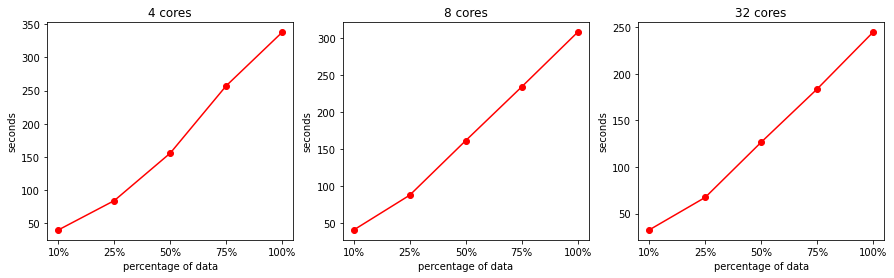

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
labels = [(str(int(frac * 100)) + '%') for frac in fracs]
titles = ['4 cores', '8 cores', '32 cores']

for i in range(len(all_times)):
    axes[i].plot(labels, all_times[i], marker='o', color='red')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('percentage of data')
    axes[i].set_ylabel('seconds')

plt.savefig(os.path.join(os.getcwd(), 'graphics', 'all_in_single_drawing.png'))
plt.show()

### Build all grpahics in a single plot

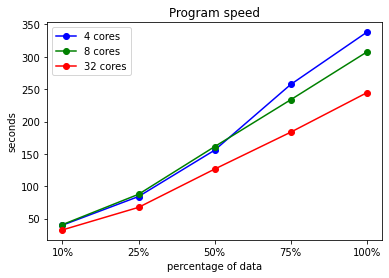

In [28]:
ticks = [(str(int(frac * 100)) + '%') for frac in fracs]
colors = ['blue', 'green', 'red', 'black']
labels = ['4 cores', '8 cores', '32 cores']

for i in range(len(all_times)):
    plt.plot(ticks, all_times[i], marker='o', color=colors[i], label=labels[i])
plt.title('Program speed')
plt.ylabel('seconds')
plt.xlabel('percentage of data')
plt.legend()
#plt.savefig(os.path.join(os.getcwd(), 'graphics', 'all_in_single_plot.png'))
plt.show()

### Check frist values

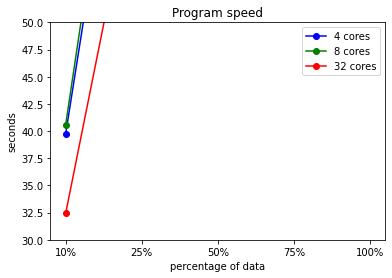

In [30]:
ticks = [(str(int(frac * 100)) + '%') for frac in fracs]
colors = ['blue', 'green', 'red', 'black']
labels = ['4 cores', '8 cores', '32 cores']

for i in range(len(all_times)):
    plt.plot(ticks, all_times[i], marker='o', color=colors[i], label=labels[i])
plt.title('Program speed')
plt.ylabel('seconds')
plt.xlabel('percentage of data')
plt.ylim(30, 50)
plt.legend()
plt.show()